In [219]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler


In [221]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [222]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

number of no Fraud Credit Cards: 284315
number of no Fraud Credit Cards: 492
99.827% of Credit Cards are Safe
0.173% of Credit Cards are Fraud


<Axes: ylabel='Class'>

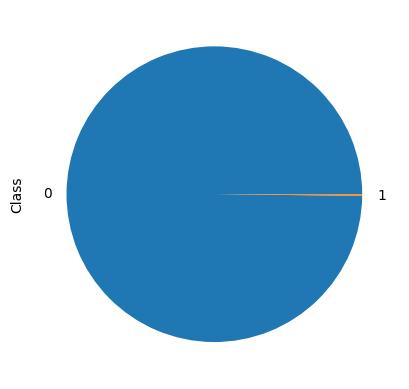

In [224]:
print("number of no Fraud Credit Cards: " + str(df["Class"].value_counts()[0]))
print("number of no Fraud Credit Cards: " + str(df["Class"].value_counts()[1]))
print(str(round(df["Class"].value_counts()[0]/ len(df) * 100, 3)) + "% of Credit Cards are Safe")
print(str(round(df["Class"].value_counts()[1]/ len(df) * 100, 3)) + "% of Credit Cards are Fraud")
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

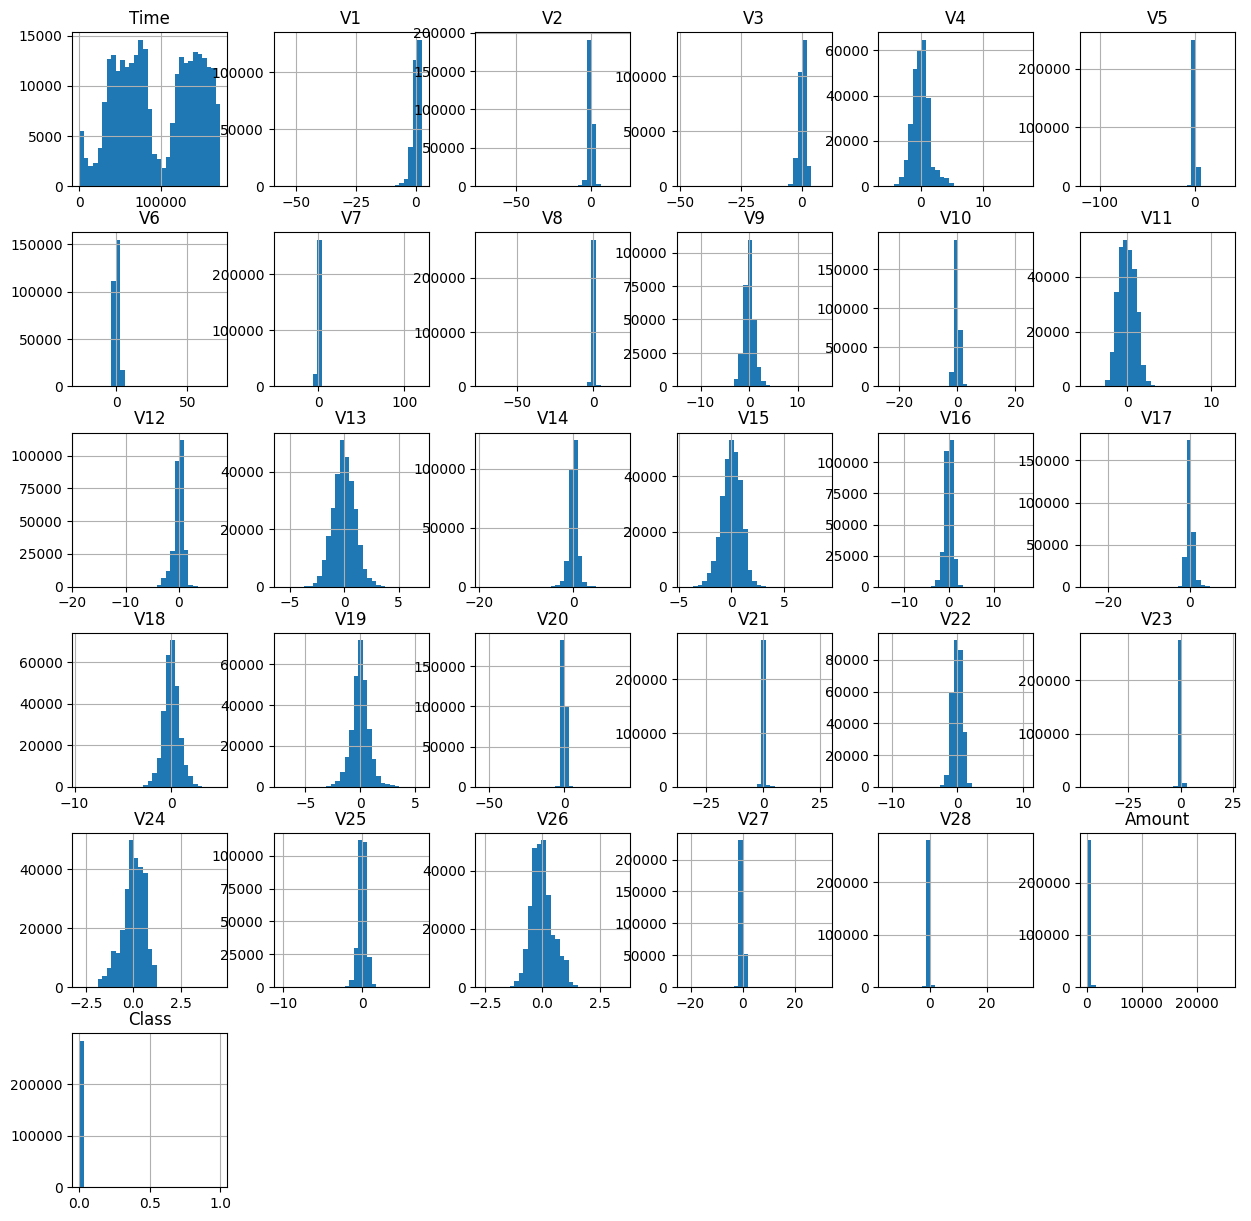

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize = (15,15),bins = 31)

<ipython-input-226-1d45fc3f5a88>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Time)


<Axes: title={'center': 'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

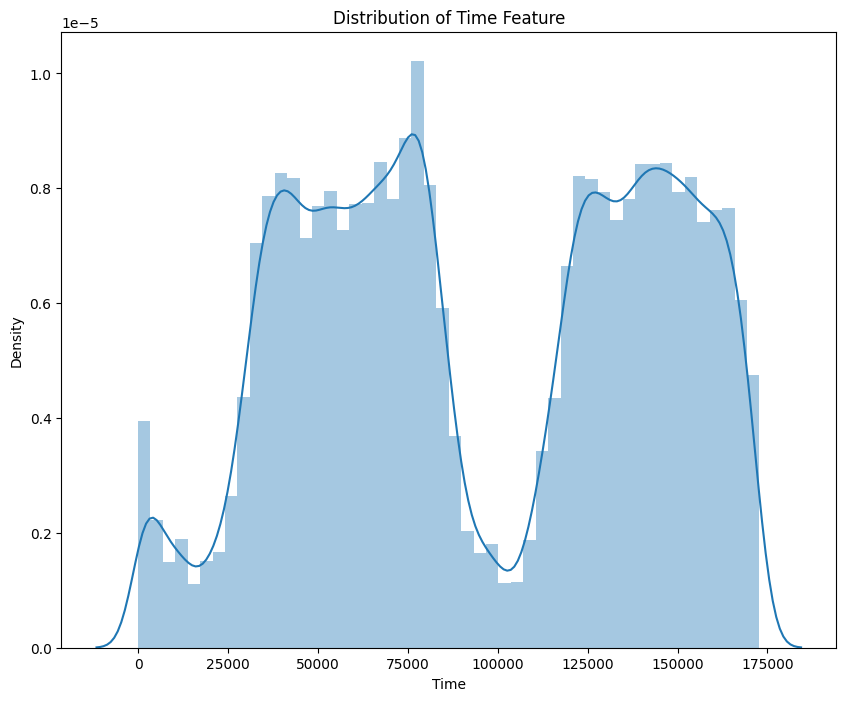

In [226]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

<ipython-input-227-28cc6a1d425b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Amount)


<Axes: title={'center': 'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

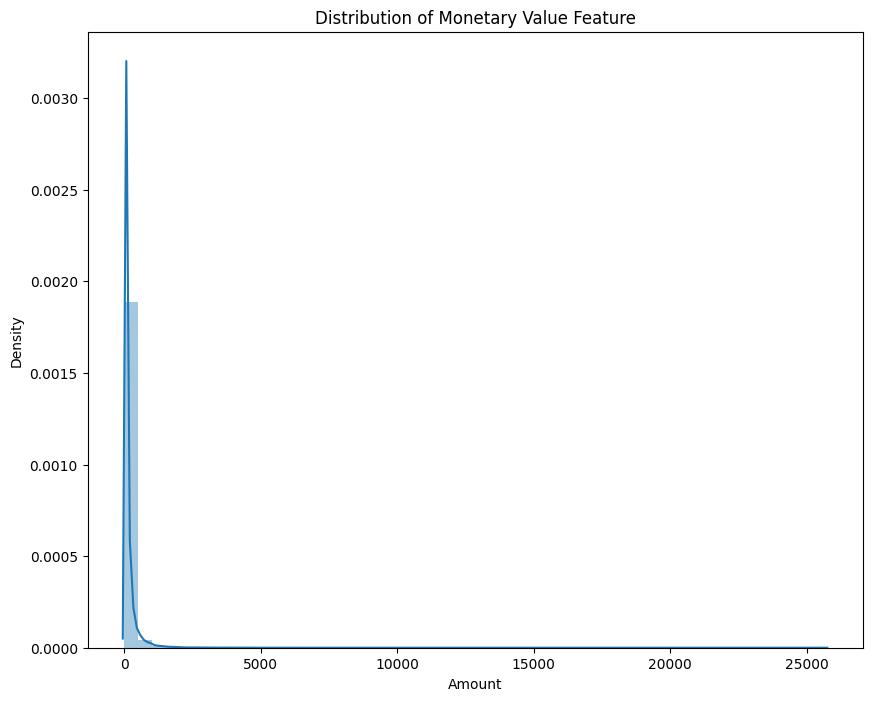

In [227]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [228]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
col_names = ['Amount', 'Time']

scaler = RobustScaler()

X_train[col_names] = scaler.fit_transform(X_train[col_names])
X_test[col_names] = scaler.transform(X_test[col_names])
new_df = pd.concat([X_train, y_train], axis=1)
new_df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,0.688774,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.167972,0
165061,0.381307,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,0.334266,0
238186,0.761745,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.140000,0
150562,0.105269,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,1.334825,0
138452,-0.024100,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,0.052587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.106749,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,-0.280000,0
259178,0.872557,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,0.940280,0
131932,-0.057691,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,-0.252587,0
146867,0.037865,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,-0.293706,0


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<Axes: ylabel='Class'>

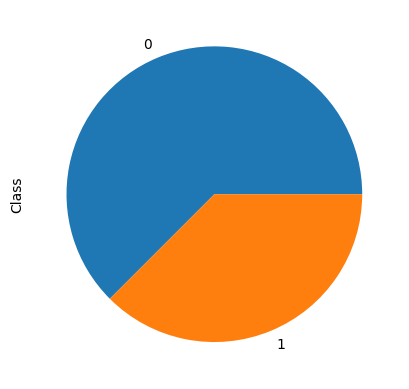

In [229]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

undersample = RandomUnderSampler(sampling_strategy='majority')
X_us, y_us = undersample.fit_resample(X_train, y_train)
under_sample_df = pd.concat([X_us, y_us], axis=1)
((under_sample_df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()


# smote1 = SMOTE(sampling_strategy=1, n_jobs = -1)
smote = SMOTE(sampling_strategy=0.6, n_jobs = -1)
X_st, y_st = smote.fit_resample(X_train, y_train)
# X_st1, y_st1 = smote1.fit_resample(X_train, y_train)
# over_sample_df1 = pd.concat([X_st, y_st], axis=1)
over_sample_df = pd.concat([X_st, y_st], axis=1)
# ((over_sample_df1.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


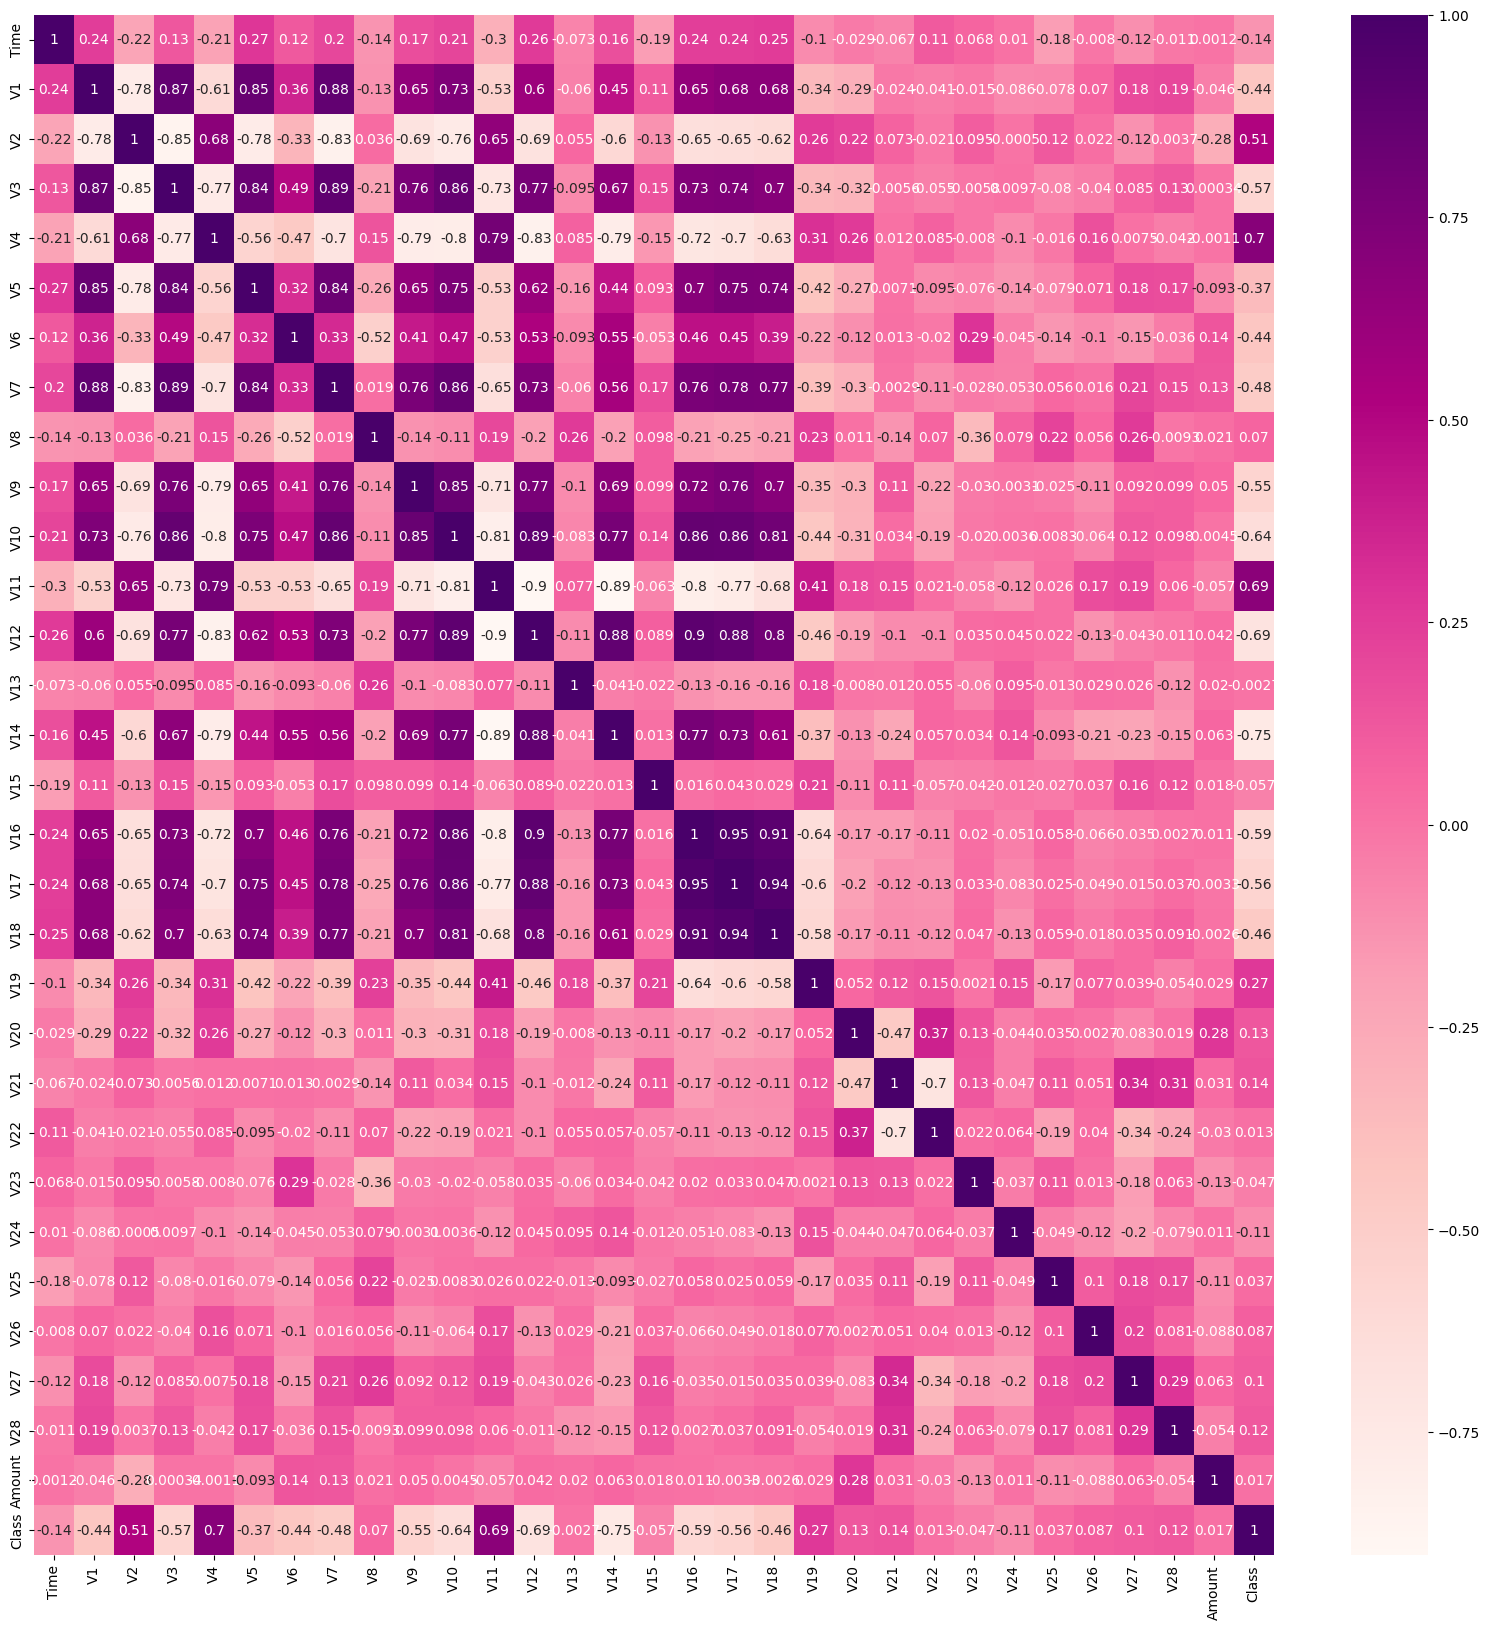

In [230]:
print('Distribution of the Classes in the subsample dataset')
print(under_sample_df['Class'].value_counts()/len(under_sample_df))
plt.figure(figsize=(20, 20))
sub_sample_corr = under_sample_df.corr()
sns.heatmap(sub_sample_corr, cmap='RdPu', annot=True, annot_kws={'size':10})

plt.show()

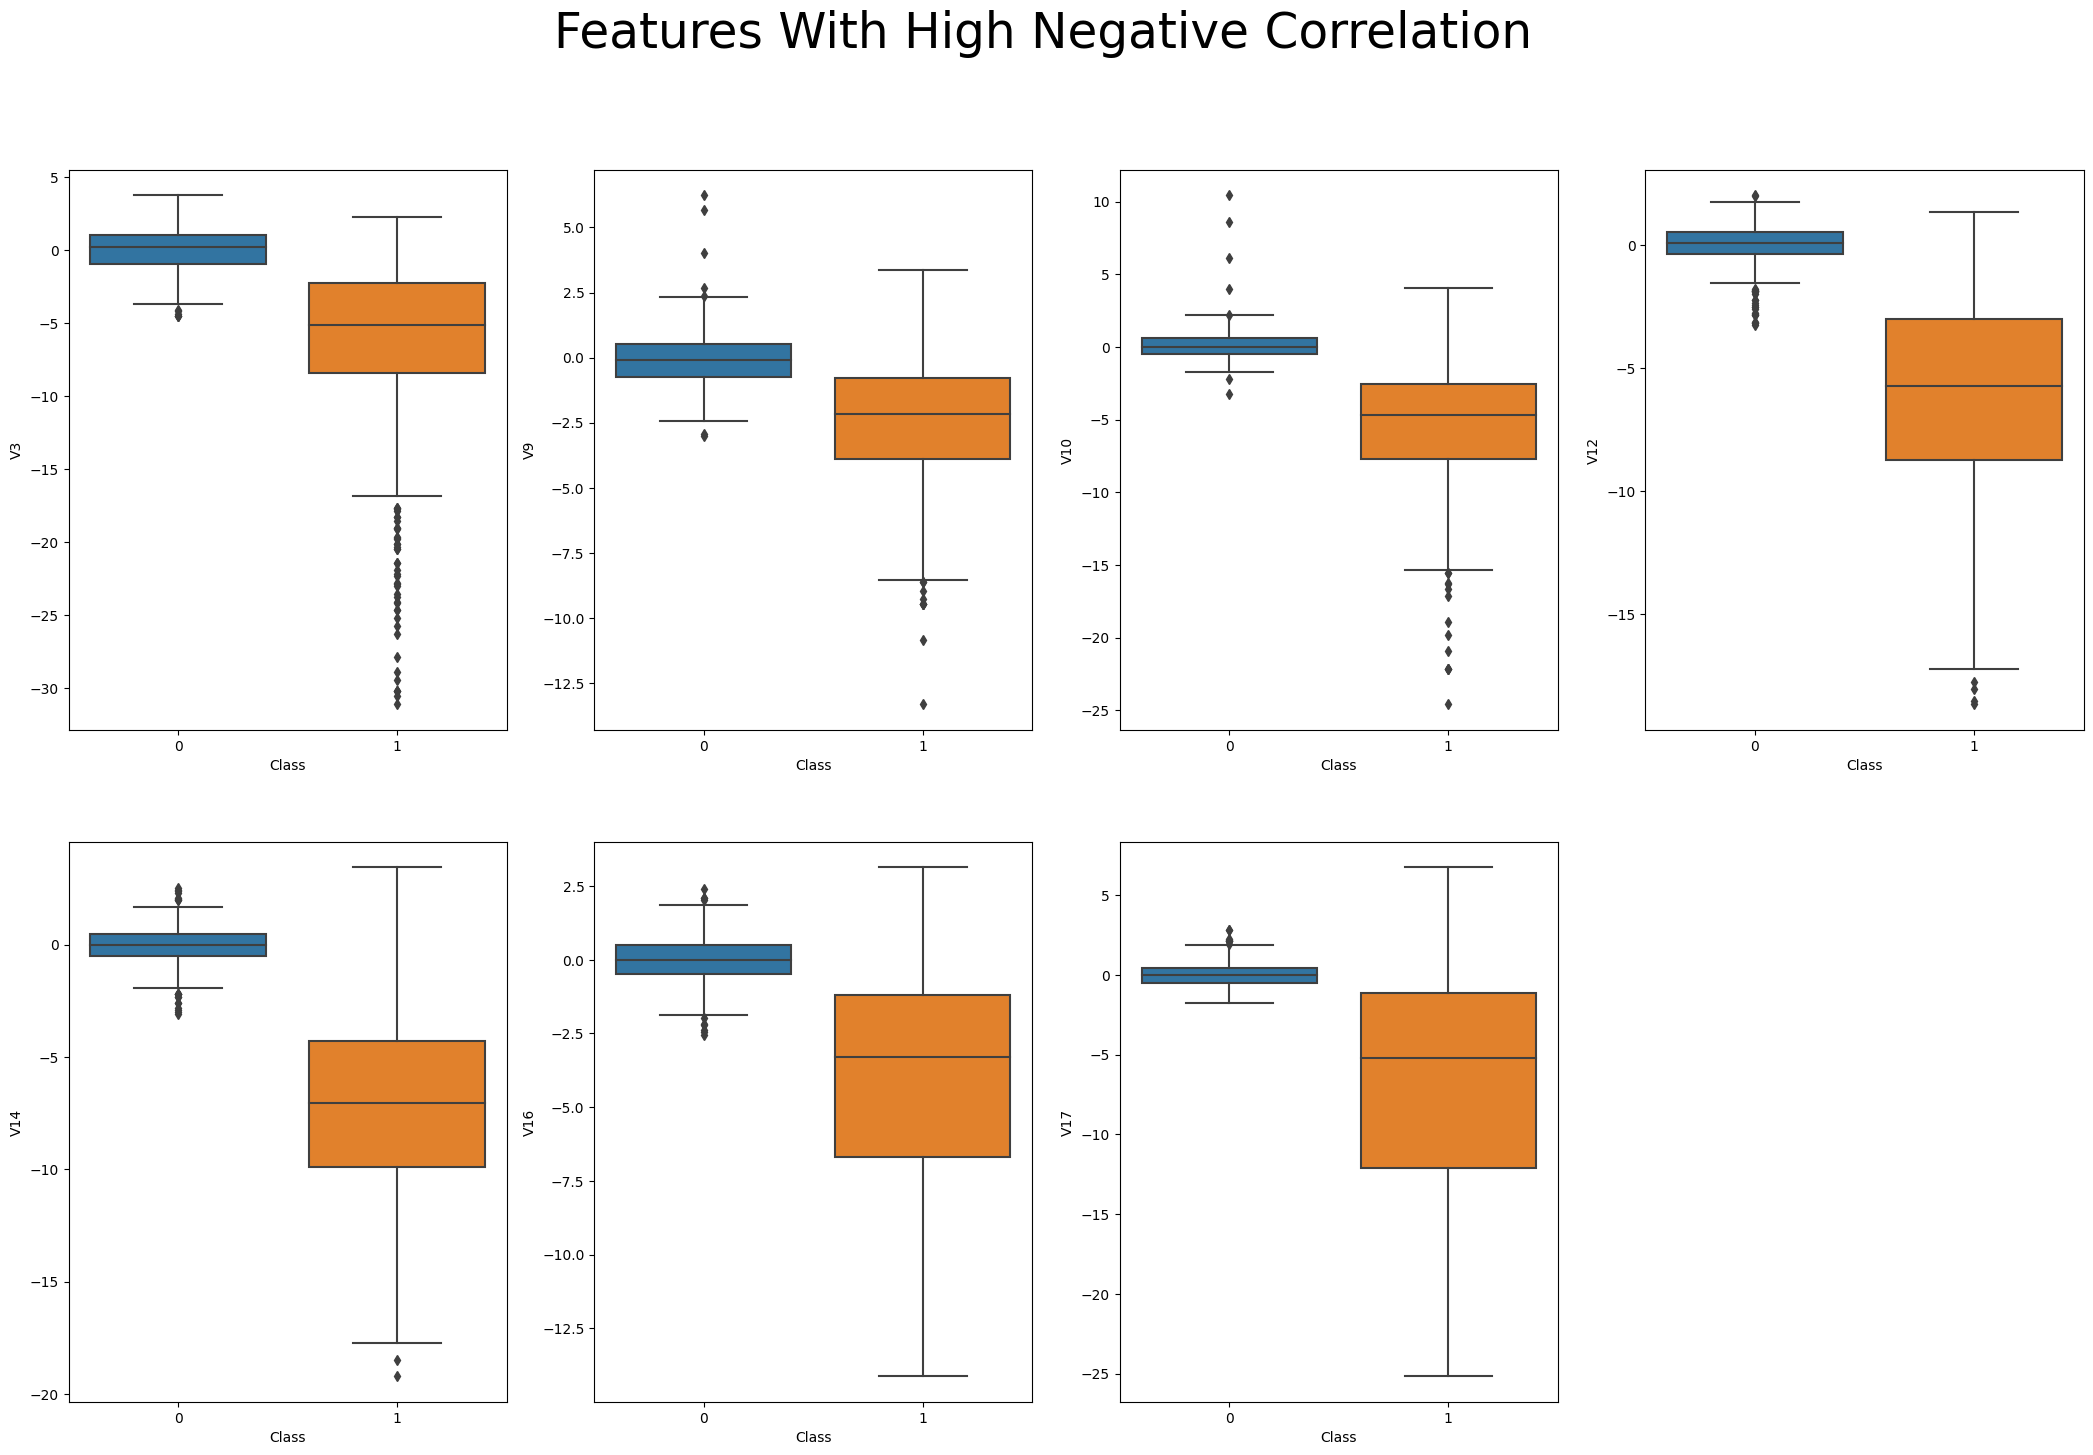

In [231]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=under_sample_df, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=under_sample_df, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=under_sample_df, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=under_sample_df, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=under_sample_df, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=under_sample_df, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=under_sample_df, ax=axes[1,2])
f.delaxes(axes[1,3])

<Axes: xlabel='Class', ylabel='V11'>

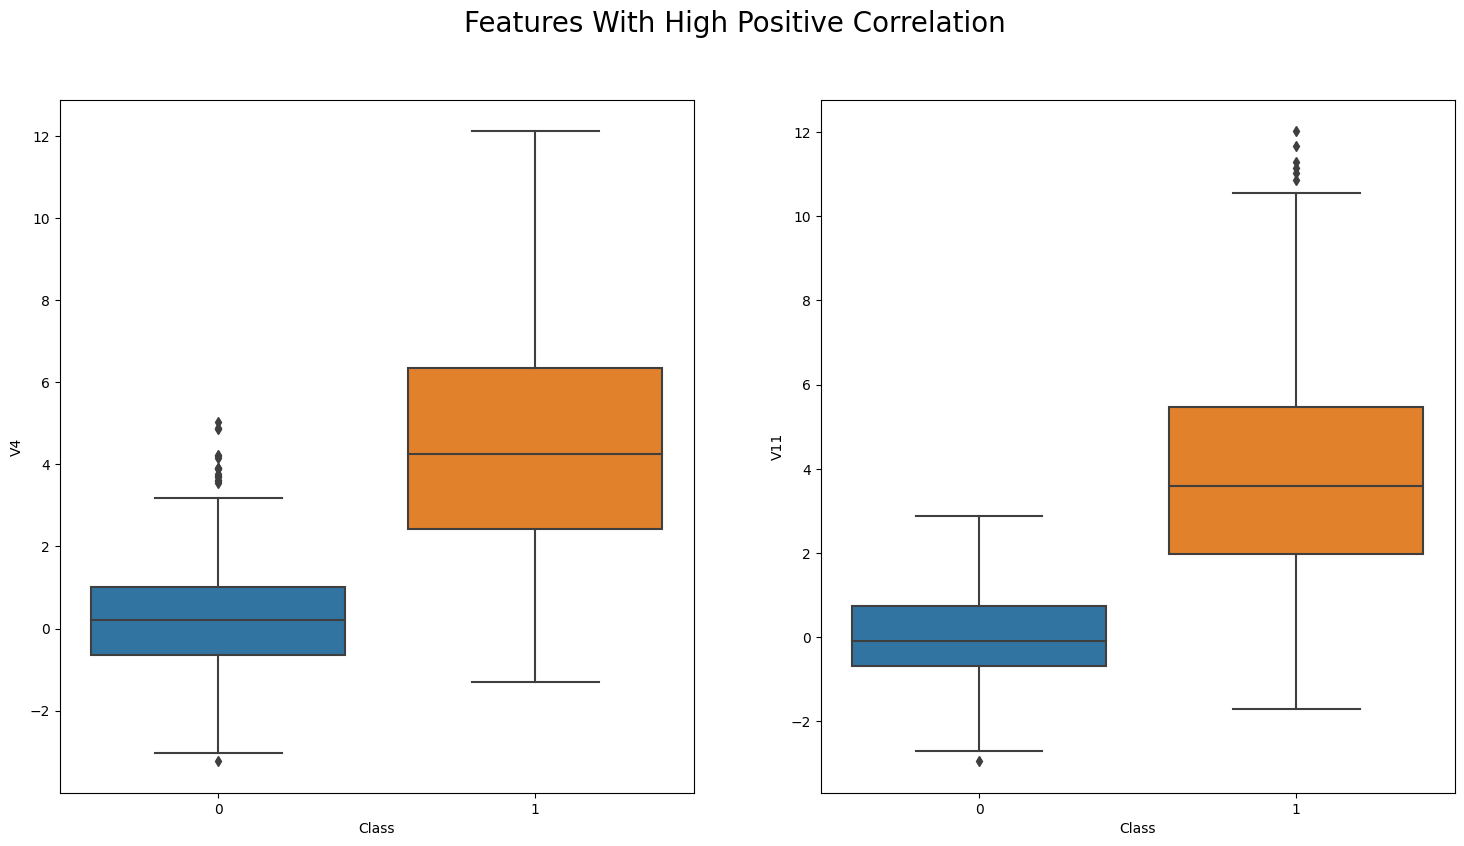

In [232]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=under_sample_df, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=under_sample_df, ax=axes[1])

In [233]:
logreg = LogisticRegression(random_state=42, max_iter=100, solver='newton-cholesky')
logreg.fit(X_st, y_st)

y_pred = logreg.predict(X_test)
lg_report = classification_report(y_test, y_pred)
print(lg_report)
cm = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.92      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



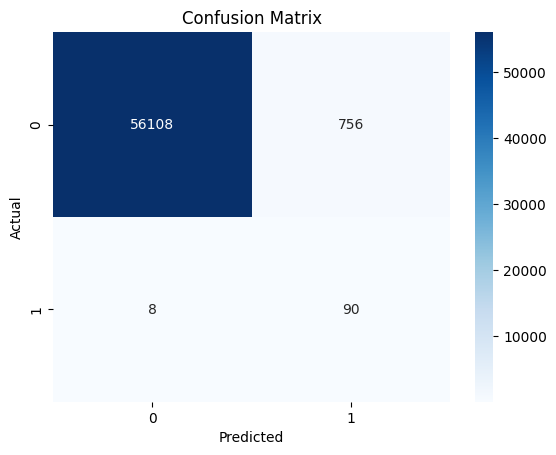

<function roc_auc_score at 0x79cf00947a30>


In [234]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

roc_auc_score(y_test, y_pred)
print(roc_auc_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


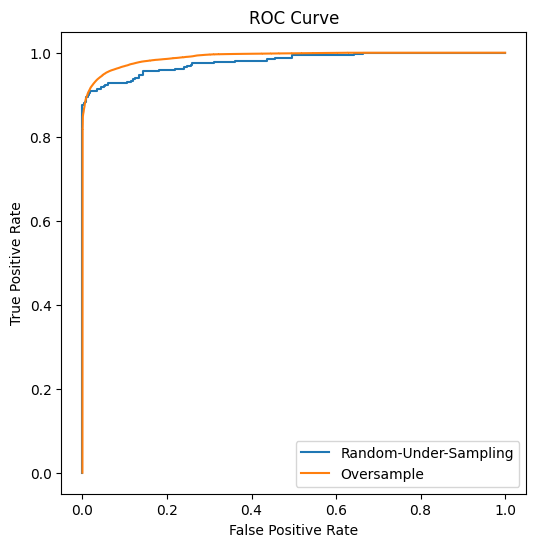

In [235]:
datas = {'Random-Under-Sampling': under_sample_df,'Oversample': over_sample_df}
auc2={}
fpr={}
tpr={}

for i in range(len(datas)):
    #Split dataset
    X = (list(datas.values())[i]).drop('Class', axis=1)
    y = (list(datas.values())[i])['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]

    lr_auc = roc_auc_score(y_test, lr_probs)

    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    auc2[list(datas.keys())[i]]=lr_auc
    fpr[list(datas.keys())[i]]=lr_fpr
    tpr[list(datas.keys())[i]]=lr_tpr
# plot the roc curve for the model
plt.plot(list(fpr.values())[0], list(tpr.values())[0],  label=list(tpr.keys())[0])
plt.plot(list(fpr.values())[1], list(tpr.values())[1],  label=list(tpr.keys())[1])


# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6, 6)

# show the plot
plt.show()

In [236]:
X = df.drop('Class', axis=1)
Y = df['Class']
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [237]:
print('length of cluster 1 : ', len(kmeans.labels_[kmeans.labels_==0]))

print('length of cluster 2 : ', len(kmeans.labels_[kmeans.labels_==1]))

length of cluster 1 :  131644
length of cluster 2 :  153163


In [238]:
cluster1 = X[kmeans.labels_==0]
cluster2 = X[kmeans.labels_==1]
cluster1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,...,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000,131644.000000
mean,141079.067705,0.273855,-0.051511,-0.706930,-0.155080,0.279419,-0.080985,0.121057,-0.061280,0.040524,...,-0.045983,0.043297,0.127688,0.033261,-0.013619,-0.135711,-0.026713,-0.002182,-0.003320,87.997930
std,17541.684282,2.058477,1.684687,1.414078,1.473335,1.390707,1.376419,1.274281,1.138319,1.060904,...,0.820904,0.726609,0.789619,0.666483,0.616714,0.565606,0.470541,0.416994,0.349976,254.370127
min,98067.000000,-46.855047,-50.383269,-48.325589,-5.683171,-113.743307,-20.869626,-43.557242,-41.044261,-13.434066,...,-54.497720,-22.797604,-7.417140,-36.666000,-2.790479,-8.696627,-2.241620,-9.895244,-15.430084,0.000000
25%,126942.750000,-0.778171,-0.669041,-1.577886,-0.962396,-0.418879,-0.870853,-0.485841,-0.278909,-0.572692,...,-0.247305,-0.227589,-0.529283,-0.145084,-0.382412,-0.450227,-0.331102,-0.075672,-0.062594,5.480000
50%,141546.000000,0.125140,-0.000467,-0.712640,-0.311771,0.260824,-0.383424,0.152003,-0.045480,0.031557,...,-0.105095,0.034219,0.191294,0.037611,0.015077,-0.190508,-0.046688,-0.009500,-0.029115,21.300000
75%,155550.000000,1.980077,0.803561,0.151664,0.438268,0.890505,0.314571,0.743761,0.269161,0.626697,...,0.091307,0.252019,0.751802,0.225956,0.525294,0.229824,0.211484,0.093140,0.078418,75.612500
max,172792.000000,2.454930,22.057729,4.187811,15.304184,29.162172,73.301626,120.589494,12.766112,8.691889,...,23.649095,20.063786,8.361985,22.528412,4.584549,6.070850,3.415636,31.612198,16.129609,25691.160000


In [239]:
cluster2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,...,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000,153163.000000
mean,55048.791908,-0.235379,0.044274,0.607609,0.133292,-0.240161,0.069607,-0.104049,0.052671,-0.034831,...,0.039523,-0.037214,-0.109748,-0.028588,0.011705,0.116644,0.022960,0.001875,0.002854,88.651897
std,22537.118752,1.836336,1.620769,1.325767,1.350391,1.324914,1.289067,1.194453,1.238076,1.128895,...,0.722890,0.739238,0.646019,0.584430,0.595724,0.448204,0.490891,0.391776,0.311946,246.409068
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.462573,...,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000
25%,39327.500000,-1.021747,-0.540561,0.101917,-0.724142,-0.876281,-0.674858,-0.598503,-0.142699,-0.687653,...,-0.174315,-0.228888,-0.551441,-0.170733,-0.327369,-0.158007,-0.325795,-0.062532,-0.009170,5.850000
50%,56635.000000,-0.259929,0.118878,0.707417,0.154446,-0.281209,-0.187659,-0.051214,0.073304,-0.119814,...,-0.029875,-0.059727,-0.086036,-0.041927,0.065583,0.155626,-0.056388,0.011089,0.022960,22.600000
75%,73653.000000,1.164141,0.803903,1.338528,0.974988,0.291445,0.457214,0.434139,0.369073,0.563026,...,0.162329,0.115030,0.319338,0.088507,0.411220,0.413413,0.287231,0.089781,0.078221,79.000000
max,98063.000000,2.401777,18.902453,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000


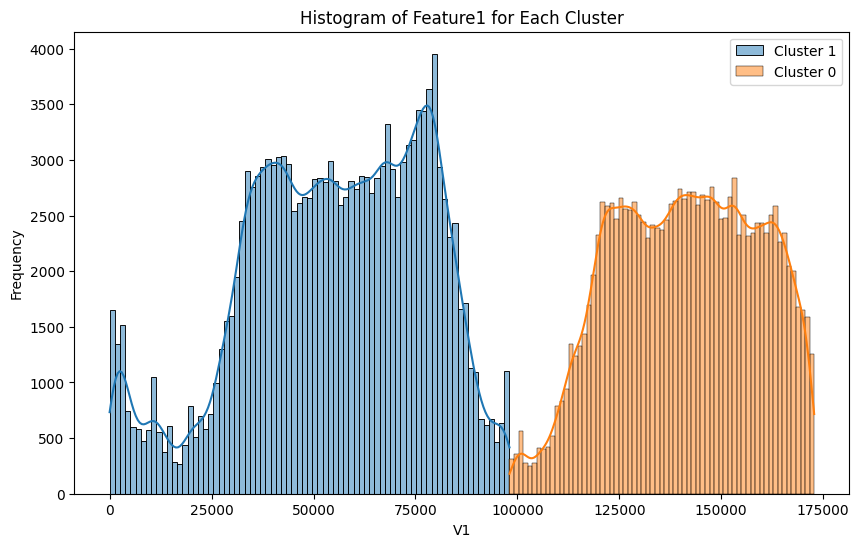

In [240]:
cluster_df = pd.DataFrame(data={'V1': X.iloc[:, 0], 'Cluster': labels})

# Plot histograms for each cluster
plt.figure(figsize=(10, 6))
for cluster_label in cluster_df['Cluster'].unique():
    sns.histplot(cluster_df[cluster_df['Cluster'] == cluster_label]['V1'], label=f'Cluster {cluster_label}', kde=True)

plt.title('Histogram of Feature1 for Each Cluster')
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

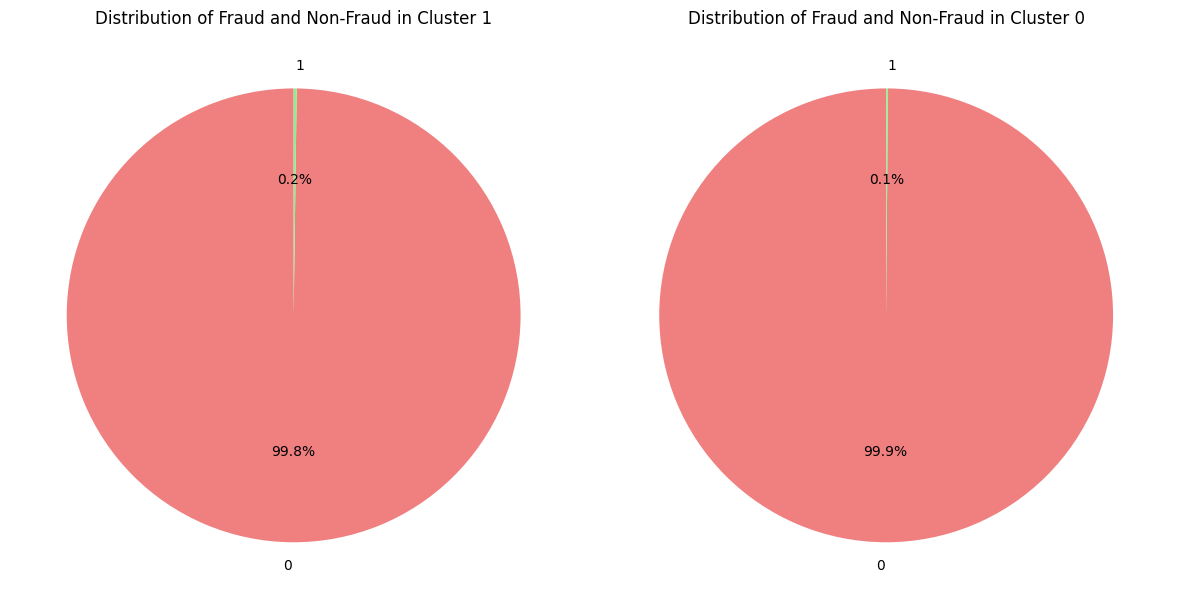

In [241]:
data = pd.DataFrame({'Class': Y, 'Cluster': labels})

# Create a pie chart for each cluster
clusters = data['Cluster'].unique()
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(12, 6))
for i, cluster in enumerate(clusters):
    cluster_data = data[data['Cluster'] == cluster]['Class'].value_counts()

    plt.subplot(1, len(clusters), i + 1)
    plt.pie(cluster_data, labels=cluster_data.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Distribution of Fraud and Non-Fraud in Cluster {cluster}')

plt.tight_layout()
plt.show()

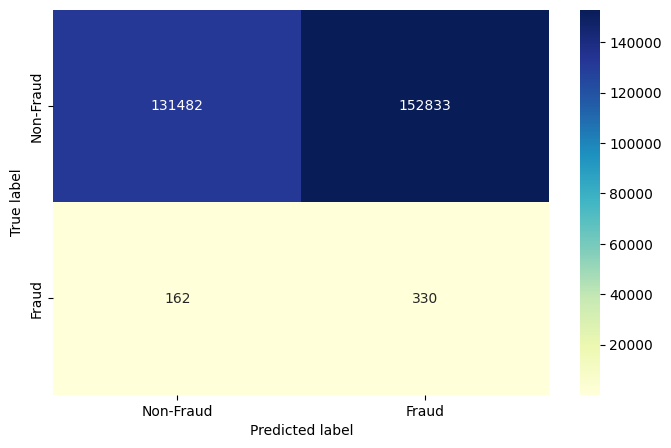

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63    284315
           1       0.00      0.67      0.00       492

    accuracy                           0.46    284807
   macro avg       0.50      0.57      0.32    284807
weighted avg       1.00      0.46      0.63    284807



In [242]:
conf_matrix = confusion_matrix(Y, labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(Y, labels))